### Importe les bibliothèques nécessaires:

In [21]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import sklearn as sklearn 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

# 1-Visualisation de données

In [22]:
# (,) est un séparateur par defaut
df = pd.read_csv('weatherAUS.csv')
df.shape

(145460, 23)

In [23]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [25]:
#Trouver le nombre des valeurs null dans le dataset
df.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [26]:
# Afficher les types de colonnes
dt_type = pd.DataFrame(df.dtypes,columns=['type'])
dt_type

,type
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [27]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [28]:
set(df["Location"])

{'Adelaide',
 'Albany',
 'Albury',
 'AliceSprings',
 'BadgerysCreek',
 'Ballarat',
 'Bendigo',
 'Brisbane',
 'Cairns',
 'Canberra',
 'Cobar',
 'CoffsHarbour',
 'Dartmoor',
 'Darwin',
 'GoldCoast',
 'Hobart',
 'Katherine',
 'Launceston',
 'Melbourne',
 'MelbourneAirport',
 'Mildura',
 'Moree',
 'MountGambier',
 'MountGinini',
 'Newcastle',
 'Nhil',
 'NorahHead',
 'NorfolkIsland',
 'Nuriootpa',
 'PearceRAAF',
 'Penrith',
 'Perth',
 'PerthAirport',
 'Portland',
 'Richmond',
 'Sale',
 'SalmonGums',
 'Sydney',
 'SydneyAirport',
 'Townsville',
 'Tuggeranong',
 'Uluru',
 'WaggaWagga',
 'Walpole',
 'Watsonia',
 'Williamtown',
 'Witchcliffe',
 'Wollongong',
 'Woomera'}

In [29]:
# Afficher le nombre des localisations
df.Location.nunique()

49

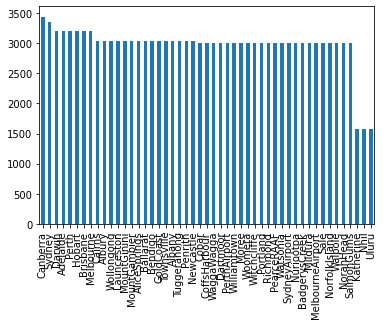

In [30]:
df["Location"].value_counts().plot.bar()
plt.show()
# C'est une probabelité presque uniforme  

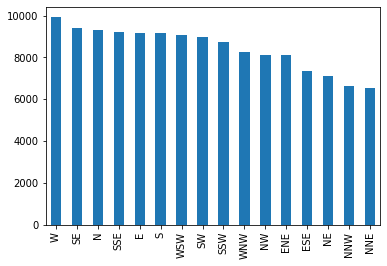

In [31]:
df["WindGustDir"].value_counts().plot.bar()
plt.show()


In [32]:
# remplir les valeurs manquantes pour les variables continues avec la moyenne (si c'est un flottant) ou le mode
#On remarque que la date et la localisation n'ont pas des valeurs null

df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df["MaxTemp"]= df["MaxTemp"].fillna(df["MaxTemp"].mean())
df["Evaporation"]= df["Evaporation"].fillna(df["Evaporation"].mean())
df["Sunshine"]= df["Sunshine"].fillna(df["Sunshine"].mean())
df["WindGustSpeed"]= df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean())
df["Rainfall"]= df["Rainfall"].fillna(df["Rainfall"].mean())
df["WindSpeed9am"]= df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean())
df["WindSpeed3pm"]= df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())
df["Humidity9am"]= df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"]= df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
df["Pressure9am"]= df["Pressure9am"].fillna(df["Pressure9am"].mean())
df["Pressure3pm"]= df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
df["Cloud9am"]= df["Cloud9am"].fillna(df["Cloud9am"].mean())
df["Cloud3pm"]= df["Cloud3pm"].fillna(df["Cloud3pm"].mean())
df["Temp9am"]= df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"]= df["Temp3pm"].fillna(df["Temp3pm"].mean())
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [33]:
df.T.head(df.shape[1])

,0,1,2,3,4,5,6,7,8,9,...,145450,145451,145452,145453,145454,145455,145456,145457,145458,145459
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05,2008-12-06,2008-12-07,2008-12-08,2008-12-09,2008-12-10,...,2017-06-16,2017-06-17,2017-06-18,2017-06-19,2017-06-20,2017-06-21,2017-06-22,2017-06-23,2017-06-24,2017-06-25
Location,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,...,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru
MinTemp,13.400000,7.400000,12.900000,9.200000,17.500000,14.600000,14.300000,7.700000,9.700000,13.100000,...,5.200000,6.400000,8.000000,7.400000,3.500000,2.800000,3.600000,5.400000,7.800000,14.900000
MaxTemp,22.900000,25.100000,25.700000,28.000000,32.300000,29.700000,25.000000,26.700000,31.900000,30.100000,...,24.300000,23.400000,20.700000,20.600000,21.800000,23.400000,25.300000,26.900000,27.000000,23.221348
Rainfall,0.600000,0.000000,0.000000,0.000000,1.000000,0.200000,0.000000,0.000000,0.000000,1.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Evaporation,5.468232,5.468232,5.468232,5.468232,5.468232,5.468232,5.468232,5.468232,5.468232,5.468232,...,5.468232,5.468232,5.468232,5.468232,5.468232,5.468232,5.468232,5.468232,5.468232,5.468232
Sunshine,7.611178,7.611178,7.611178,7.611178,7.611178,7.611178,7.611178,7.611178,7.611178,7.611178,...,7.611178,7.611178,7.611178,7.611178,7.611178,7.611178,7.611178,7.611178,7.611178,7.611178
WindGustDir,W,WNW,WSW,NE,W,WNW,W,W,NNW,W,...,E,ESE,ESE,E,E,E,NNW,N,SE,W
WindGustSpeed,44.000000,44.000000,46.000000,24.000000,41.000000,56.000000,50.000000,35.000000,80.000000,28.000000,...,24.000000,31.000000,41.000000,35.000000,31.000000,31.000000,22.000000,37.000000,28.000000,40.035230
WindDir9am,W,NNW,W,SE,ENE,W,SW,SSE,SE,S,...,SE,S,SE,ESE,ESE,SE,SE,SE,SSE,ESE


In [34]:
#re-check
(df.isnull().sum()/len(df))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

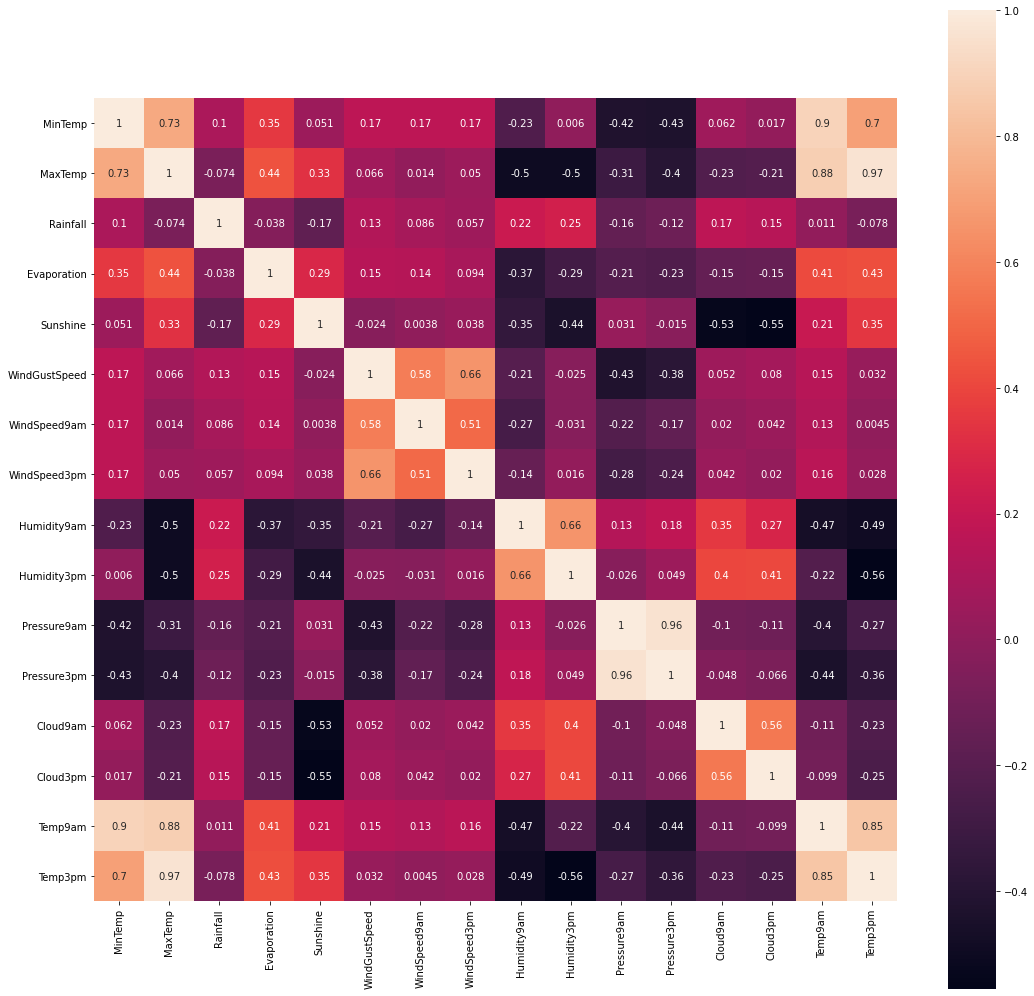

In [36]:
#Afficher les corrélation
correlation = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation, annot=True, square=True)
plt.show()

Observations :\
Les variables MaxTemp et Temp3pm sont corrélées(0.97).\
Les variables Temp3pm et Temp9am sont corrélées(0.85).\
Les variables MinTemp et Temp9am sont corrélées (0.9).\
Les variables MinTemp et Temp3pm sont corrélées (0.7).

### Détection des valeurs aberrantes

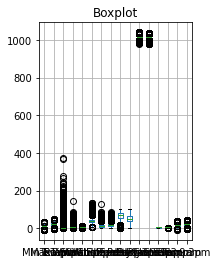

In [37]:
plt.subplot(1,2,1)
bp1 = df.boxplot()
plt.title("Boxplot")

df_copy=df.copy()

# On peut remarquer que nos données ne sont pas normalisées surtout le cas des deux
# attributs : Pressure3pm et Pressure9am (valeurs entre 950 et 1050) => envisager une renormalisation des données

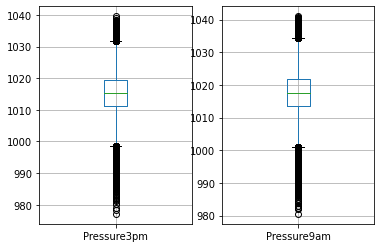

In [38]:
df1 = pd.DataFrame(df['Pressure3pm'])
df2= pd.DataFrame(df['Pressure9am'])

plt.subplot(1,2,1)
bp1 = df1.boxplot()


plt.subplot(1,2,2)
bp2 = df2.boxplot()


In [39]:
# Selectionner les types qui sont pas des objets pour les normaliser (int et float)
df2=df.select_dtypes(include=[np.float,np.int])
list(df2.columns)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [40]:
# Une fonction pour normaliser chaque ligne 
def normalized(df, column_name):
    df[column_name].fillna(value=0, inplace=True)
    df[column_name] = df[column_name] / df[column_name].max()
    return df

In [41]:
dataset=df
for i in dataset:
    if dataset[i].dtype=='float64':
        q1 = dataset[i].quantile(0.25)
        q3 = dataset[i].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(dataset[i])
        for j in dataset[i]:
            if j > Upper_tail or j < Lower_tail:
                dataset[i] = dataset[i].replace(j, med)
    else:
        continue  

Text(0.5, 1.0, 'Sans les valeurs aberrantes')

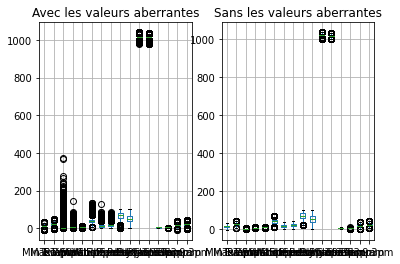

In [44]:
plt.subplot(1,2,1)
bp1 = df_copy.boxplot()
plt.title("Avec les valeurs aberrantes")

plt.subplot(1,2,2)
bp1 = dataset.boxplot()
plt.title("Sans les valeurs aberrantes")

Text(0.5, 1.0, 'Sans valeurs aberrantes')

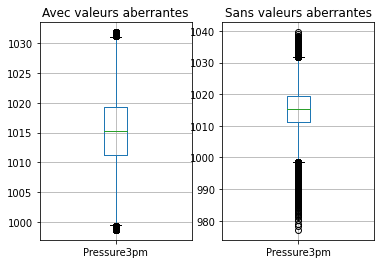

In [45]:
df_boxplot1 = pd.DataFrame(dataset['Pressure3pm'])
df_boxplot2 = pd.DataFrame(df_copy['Pressure3pm'])

plt.subplot(1,2,1)
bp11 = df_boxplot1.boxplot()
plt.title("Avec valeurs aberrantes")

plt.subplot(1,2,2)
bp12 = df_boxplot2.boxplot()
plt.title("Sans valeurs aberrantes")
# On voit mieux la différence avec un seule attribut comme exemple

### Prédicter la pluie en Australie (Pas de localisation précise )

In [46]:
# On a pas besoin du feature Location
# On supprime le feature Date aussi 
df = dataset.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
df.shape

(145460, 17)

In [47]:
# Changer yes/no par 1/0 pour les colonnes RainToday et RainTomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

# Trouver les valeurs uniques et les convertir à type int en utilisant pd.getDummies() 
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))
df = pd.get_dummies(df, columns=categorical_columns)
df.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,39.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,1,0,0,0,0,0,0


In [48]:
# La prochaine étape est de standardiser nos données- utilisant MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.646409,0.724816,0.40,0.551724,0.189189,0.512821,0.780488,0.33,0.293051,0.220544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.566298,0.660934,0.08,0.810345,0.513514,0.615385,0.451220,0.23,0.244713,0.202417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.558011,0.545455,0.00,0.706897,0.540541,0.615385,0.378049,0.19,0.256798,0.287009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.375691,0.587224,0.00,0.448276,0.162162,0.435897,0.365854,0.19,0.371601,0.344411,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.430939,0.714988,0.00,0.517241,0.189189,0.717949,0.292683,0.09,0.235650,0.148036,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.524862,0.670762,0.56,0.327586,0.405405,0.282051,0.487805,0.27,0.178248,0.211480,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X=df.drop(['RainTomorrow'],axis=1)
y = df[['RainTomorrow']]

In [50]:
#arbre de décision (decision tree) est une méthode d'apprentissage supervisé non paramétrique utilisée pour la classification et la régression. 
#son but est de créer un modèle qui prédit la valeur d'une variable cible

In [51]:
# Classificateur d'arbre de décision avec max_depth = 4
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0,min_samples_split=2,max_depth=4)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8309638388560429
Time taken : 2.1074483394622803


In [52]:
# Classificateur d'arbre de décision avec max_depth = 2
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0,min_samples_split=2,max_depth=2)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8244740822219166
Time taken : 0.36411380767822266


In [53]:
# Mellieur parametrage
from sklearn.model_selection import GridSearchCV
parametre = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 4, 8]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=parametre, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 7, 'min_samples_split': 4}

>1, train: 0.816, test: 0.815
>2, train: 0.823, test: 0.823
>3, train: 0.829, test: 0.829
>4, train: 0.831, test: 0.831
>5, train: 0.837, test: 0.837
>6, train: 0.838, test: 0.838


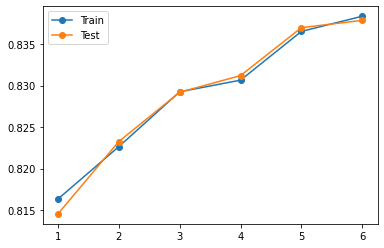

train_acc: 0.838, test_acc: 0.838


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
# définir des listes pour collecter les scores
train_scores, test_scores = list(), list()
# définir les depths d'arbre à évaluer
val = [i for i in range(1, 7)]
# evaluer l'arbre de décision pour chaque depth
for i in val:
    dtc = DecisionTreeClassifier(max_depth=i,random_state=1,min_samples_split=4)
    dtc.fit(X_train, y_train)
    # evaluer le  train dataset
    train_ydtc = dtc.predict(X_train)
    train_acc = accuracy_score(y_train, train_ydtc)
    train_scores.append(train_acc)
    # evaluer le test dataset
    test_ydtc = dtc.predict(X_test)
    test_acc = accuracy_score(y_test, test_ydtc)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot les scores de train et test vs tree depth
pyplot.plot(val, train_scores, '-o', label='Train')
pyplot.plot(val, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()
print('train_acc: %.3f, test_acc: %.3f' % (train_acc, test_acc))

In [ ]:
#le model est en overfitting (train_acc > test_acc)

In [56]:
#knn
#La méthode de K plus proches voisins est une méthode simple,intuitive et non paramétrique. 
#Elle est basée sur la notion de voisinage. Son principe consiste à faire voter les plus proches voisins 
#afin de prédire l’appartenance d’un nouvel exemple en l’attribuant à la classe majoritaire tout en adoptant une métrique basée sur la distance.
#les paramétres de knn sont : n_neighbors: Nombre de voisins à utiliser, weights: 
#Fonction de poids utilisée dans la prédiction. algorithm:
#Algorithme utilisé pour calculer les plus proches voisins {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’},
#leaf_size:Taille de la feuille passée à BallTree ou KDTree,p: Paramètre de puissance pour la métrique 
#de Minkowski. Lorsque p = 1, cela est équivalent à l'utilisation de manhattan_distance (l1), 
#et euclidean_distance (l2) pour p = 2. Pour p arbitraire, on utilise minkowski_distance (l_p), metric: 
#la métrique de distance utiliser pour l'arbre, n_jobs : Le nombre de parallel jobs à exécuter pour la 
#recherche de voisins.
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3,weights='uniform')
predknn=knn_model.fit(X_train,y_train).predict(X_test)
print("KNN accuracy : ",accuracy_score(y_test,predknn))

KNN accuracy :  0.792905266052523


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2,weights= 'distance')
predknn=knn_model.fit(X_train,y_train).predict(X_test)
print("KNN accuracy : ",accuracy_score(y_test,predknn))

KNN accuracy :  0.7668362436408634


Accuracy : 0.8407534717448095
Time taken : 0.6651747226715088
('MinTemp', 0.01469570552233446)
('MaxTemp', 0.010968770583292438)
('Rainfall', 0.0054071622776424135)
('WindGustSpeed', 0.05168179473371802)
('WindSpeed9am', 0.0011605630059774706)
('WindSpeed3pm', 0.0)
('Humidity9am', 0.007837987947385402)
('Humidity3pm', 0.7221497155903084)
('Pressure9am', 0.00629481949976916)
('Pressure3pm', 0.08141328515679844)
('Temp9am', 0.0012366787521602444)
('Temp3pm', 0.008330320581390323)
('RainToday', 0.07831650553358963)
('RainTomorrow', 0.0)
('WindGustDir_E', 0.0)
('WindGustDir_ENE', 0.0)
('WindGustDir_ESE', 0.0)
('WindGustDir_N', 0.0009615566224702742)
('WindGustDir_NE', 0.0)
('WindGustDir_NNE', 0.0005052482334546979)
('WindGustDir_NNW', 0.0)
('WindGustDir_NW', 0.0)
('WindGustDir_S', 0.0)
('WindGustDir_SE', 0.0)
('WindGustDir_SSE', 0.0002861260729541343)
('WindGustDir_SSW', 0.0003114359807293293)
('WindGustDir_SW', 0.0)
('WindGustDir_W', 0.0)
('WindGustDir_WNW', 0.0)
('WindGustDir_WSW', 0.0)


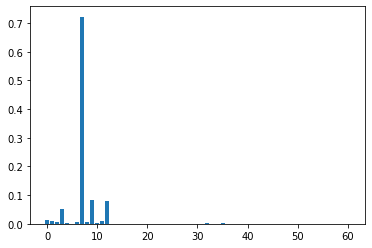

In [96]:
#Classificateur d'arbre de décision
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=1,min_samples_split=4,max_depth=7)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)
#feature importance
importance = clf_dt.feature_importances_
feat_labels = []
for i in df:
  feat_labels.append(i)
for f in zip(feat_labels, clf_dt.feature_importances_):
    print(f) #Affichage de feature et leur score
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#humidity3pm est le feature le plus important

In [97]:
# Cherchant les features les plus importates pour la sortie RainTomorrow!
# En utilisant SelectKBest 
from sklearn.feature_selection import SelectKBest, chi2
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns

Index(['Humidity9am', 'Humidity3pm', 'RainToday'], dtype='object')


In [98]:
df = df[['Humidity3pm','Rainfall','RainToday','RainTomorrow']]
X = df[['Humidity3pm']] # nous allos utiliser uniquement le feature "humiditi3pm' parcequ'il a le score le plus élvé
y = df[['RainTomorrow']]

In [118]:
#Classificateur d'arbre de décision
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=1,min_samples_split=4,max_depth=7)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8280214491956551
Time taken : 0.05339789390563965


>1, train: 0.816, test: 0.814
>2, train: 0.821, test: 0.822
>3, train: 0.826, test: 0.825
>4, train: 0.826, test: 0.825
>5, train: 0.826, test: 0.825
>6, train: 0.826, test: 0.825


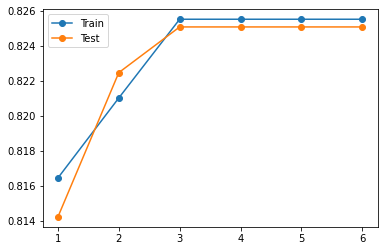

train_acc: 0.826, test_acc: 0.825


In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
val = [i for i in range(1, 7)]
# evaluer l'arbre de décision pour chaque depth
for i in val:
    dtc = DecisionTreeClassifier(max_depth=i,random_state=1,min_samples_split=2)
    dtc.fit(X_train, y_train)
    # evaluer le  train dataset
    train_ydtc = dtc.predict(X_train)
    train_acc = accuracy_score(y_train, train_ydtc)
    train_scores.append(train_acc)
    # evaluer le test dataset
    test_ydtc = dtc.predict(X_test)
    test_acc = accuracy_score(y_test, test_ydtc)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot les scores de train et test vs tree depth
pyplot.plot(val, train_scores, '-o', label='Train')
pyplot.plot(val, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()
print('train_acc: %.3f, test_acc: %.3f' % (train_acc, test_acc))

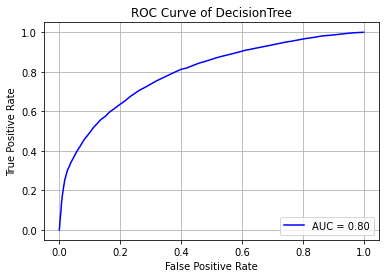

In [101]:
from sklearn.metrics import roc_curve,auc
pred_clf_prob=clf_dt.fit(X_train,y_train).predict_proba(X_test)
fpr_clf,tpr_clf,thresholds = roc_curve(y_test,pred_clf_prob[:,1])
roc_auc= auc(fpr_clf,tpr_clf)
plt.plot(fpr_clf, tpr_clf, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DecisionTree')
plt.grid(True)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
predknn=knn_model.fit(X_train,y_train).predict(X_test)
print("KNN accuracy : ",accuracy_score(y_test,predknn))

KNN accuracy :  0.782730647600715


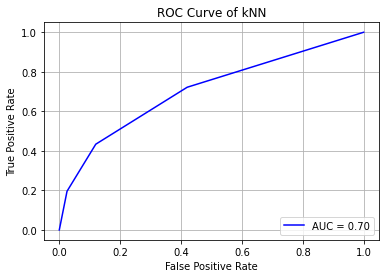

In [103]:
pred_knn_prob=knn_model.fit(X_train,y_train).predict_proba(X_test)
fpr_knn,tpr_knn,thresholds = roc_curve(y_test,pred_knn_prob[:,1])
roc_auc= auc(fpr_knn,tpr_knn)
plt.plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
#plt.plot(fpr_knn,tpr_knn)
plt.grid(True)

In [103]:
#coclusion
#nous avons réduit le surapprentissage après la selection de feature 
#le model decision tree est plus performant que le model knn 